# Text Analysis

Team Members:
Joseph Bridges (jhb2854), Cate Dombrowski (cd37589), Jordan Ehlinger (je28596), Amey Ghate (ag84957), Alicia Wilson (amw6577)

#### Code for Data Extraction

In [1]:
!pip install pytube pandas jiwer
!pip install git+https://github.com/openai/whisper.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.3 MB/s eta 0:00:00
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-8he6u432
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-8he6u432
  Resolved https://github.com/openai/whisper.git to commit b38a1f20f4b23f3f3099af2c3e0ca95627276ddf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.2 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20230918-py3-none-any.whl size=798405 sha256=83eb5e9ec1842926d2e35c3dc501b335e5654570f7fc8cf4617bc40452e5749c
  Stored in directory: /tmp/pip-ephem-wheel-cache-qrh0vw_i/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisp

In [2]:
import pandas as pd
from pytube import YouTube
import whisper
import os

# Function to download YouTube video
def download_youtube_video(link, download_path='', filename='video'):
    try:
        yt = YouTube(link)
        stream = yt.streams.filter(file_extension='mp4').first() # Using first() to get the first stream
        file_path = stream.download(output_path=download_path, filename=filename)
        return file_path
    except Exception as e:
        print(f"Error: {str(e)}")
        return None

# Function to transcribe video and store the result in a DataFrame
def transcribe_and_store(filepath):
    try:
        model = whisper.load_model('base')  # Ensure correct model name/path here
        result = model.transcribe(filepath)
        transcript_text = result['text']
        df = pd.DataFrame([transcript_text], columns=['Transcript'])
        return df
    except Exception as e:
        print(f"Transcription Error: {str(e)}")
        return pd.DataFrame(columns=['Transcript'])

# List of all YouTube links
youtube_links = youtube_links = [
    "https://www.youtube.com/watch?v=_KhBOuJcmtc",
    "https://www.youtube.com/watch?v=JFvHZmlI2qQ",
    "https://www.youtube.com/watch?v=3gT1XR8Fd5g",
    "https://www.youtube.com/watch?v=X59Xwd4Knb4",
    "https://www.youtube.com/watch?v=IjSFEt-TIL0",
    "https://www.youtube.com/watch?v=cgAGjYxzSXg",
    "https://www.youtube.com/watch?v=RG1dNBteJQ8",
    "https://www.youtube.com/watch?v=MHaBXrqikGk",
    "https://www.youtube.com/watch?v=molY_CkUrWI",
    "https://www.youtube.com/watch?v=ZLVZVFOhL-A",
    "https://www.youtube.com/watch?v=Izj7x3mx2Mw",
    "https://www.youtube.com/watch?v=S42NvOtEZmg",
    "https://www.youtube.com/watch?v=Qs3st1jjuJw",
    "https://www.youtube.com/watch?v=RqEZ0NxhFUo",
    "https://www.youtube.com/watch?v=Q0m5s6219x4",
    "https://www.youtube.com/watch?v=mCuU3T5yWaw",
    "https://www.youtube.com/watch?v=Cz4xCZr_1fc",
    "https://www.youtube.com/watch?v=RIzGflmlN44",
    "https://www.youtube.com/watch?v=rNIS-IDhcmo",
    "https://www.youtube.com/watch?v=YfoL5QeSUIM",
    "https://www.youtube.com/watch?v=EZq1fpg1_Fg",
    "https://www.youtube.com/watch?v=BBEVOAT3PRs",
    "https://www.youtube.com/watch?v=m46hdSJJUAA",
    "https://www.youtube.com/watch?v=dOoes6zHh18",
    "https://www.youtube.com/watch?v=kcY6F1IfCRw",
    "https://www.youtube.com/watch?v=_wCR7xxn7G8",
    "https://www.youtube.com/watch?v=W4ST_X1hsyk",
    "https://www.youtube.com/watch?v=9uW5XrCyyAE",
    "https://www.youtube.com/watch?v=s-XdDq8YpZ8",
    "https://www.youtube.com/watch?v=SCnCc9Vr0-4",
    "https://www.youtube.com/watch?v=43WCFNwXq0s",
    "https://www.youtube.com/watch?v=H17HbTSyrV0",
    "https://www.youtube.com/watch?v=DnfxbNQLSN0",
    "https://www.youtube.com/watch?v=cNkU5-Sr4Jc",
    "https://www.youtube.com/watch?v=HQAyy6kS8uI",
    "https://www.youtube.com/watch?v=4TM6NmYXJBI",
    "https://www.youtube.com/watch?v=NdsyIt30MS0",
    "https://www.youtube.com/watch?v=lFzwKVIVH68",
    "https://www.youtube.com/watch?v=WB1iwiK0p-U&t=812s",
    "https://www.youtube.com/watch?v=ERFkSwHtPnQ",
    "https://www.youtube.com/watch?v=mS3QbY2BXwI&t=216s"
]



# Main loop to download, transcribe, and store the transcripts
all_transcripts = pd.DataFrame(columns=['Link', 'Transcript'])

for i, link in enumerate(youtube_links):
    print(f"Processing video {i+1}")
    filename = f"video_{i+1}"
    filepath = download_youtube_video(link, filename=filename)

    if filepath:
        df = transcribe_and_store(filepath)
        df.insert(0, 'Link', link)  # Adding link for reference
        all_transcripts = pd.concat([all_transcripts, df], ignore_index=True)

        # Deleting the downloaded file to save space
        try:
            os.remove(filepath)
        except Exception as e:
            print(f"Error deleting {filepath}: {str(e)}")
    else:
        print(f"Video {i+1} failed to download")
        all_transcripts = pd.concat([all_transcripts, pd.DataFrame({'Link': [link], 'Transcript': [None]})], ignore_index=True)

# Now, `all_transcripts` DataFrame contains transcripts for all videos
print(all_transcripts)


Processing video 1


100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 65.9MiB/s]


Processing video 2
Processing video 3
Processing video 4
Processing video 5
Processing video 6
Processing video 7
Processing video 8
Processing video 9
Processing video 10
Processing video 11
Processing video 12
Processing video 13
Processing video 14
Processing video 15
Processing video 16
Processing video 17
Processing video 18
Processing video 19
Processing video 20
Processing video 21
Processing video 22
Processing video 23
Processing video 24
Processing video 25
Processing video 26
Processing video 27
Processing video 28
Processing video 29
Processing video 30
Processing video 31
Processing video 32
Processing video 33
Processing video 34
Processing video 35
Processing video 36
Processing video 37
Processing video 38
Processing video 39
Processing video 40
Processing video 41
                                                 Link  \
0         https://www.youtube.com/watch?v=_KhBOuJcmtc   
1         https://www.youtube.com/watch?v=JFvHZmlI2qQ   
2         https://www.youtube.com/wat

In [3]:
# Rest of the columns

# Initialize new columns
all_transcripts['Full Time Score'] = [
    "28-10", "59-3", "42-0", "35-27", "22-19", "52-28", "48-34", "20-45", "31-28",
    "24-30", "27-42", "22-24", "25-42", "43-24", "54-17", "61-21", "21-42", "52-51",
    "31-26", "31-17", "20-31", "27-14", "29-19", "31-17", "31-21", "07-21", "35-51",
    "42-41", "48-63", "21-33", "28-35", "54-21", "59-42", "31-24", "48-53", "26-20",
    "73-7", "37-20", "48-23", "10-24", "55-49"
]
all_transcripts['Full Time Win or Loss'] = [
    "W", "W", "W", "W", "W", "W", "W", "L", "W", "L",
    "L", "L", "L", "W", "W", "W", "L", "W", "W", "W",
    "L", "W", "W", "W", "W", "L", "L", "W", "L", "L",
    "L", "W", "W", "W", "L", "W", "W", "W", "W", "L",
    "W"
]
all_transcripts['Winnning Streak'] = [
    1, 2, 3, 4, 5, 6, 7, 0, 1, 0, 0, 0, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
    3, 4, 0, 0, 1, 0, 0, 0, 1, 2, 3, 0, 1, 1, 2, 3, 0, 1
]

print(all_transcripts.head())

                                          Link  \
0  https://www.youtube.com/watch?v=_KhBOuJcmtc   
1  https://www.youtube.com/watch?v=JFvHZmlI2qQ   
2  https://www.youtube.com/watch?v=3gT1XR8Fd5g   
3  https://www.youtube.com/watch?v=X59Xwd4Knb4   
4  https://www.youtube.com/watch?v=IjSFEt-TIL0   

                                          Transcript Full Time Score  \
0   You know we're in the game week. Obviously as...           28-10   
1   Okay, game recap. Kind of a tale of two games...            59-3   
2   Okay, so you know really pleased with the gam...            42-0   
3   Okay, so first time with you guys since watch...           35-27   
4   All right, recapping the game. You know, some...           22-19   

  Full Time Win or Loss  Winnning Streak  
0                     W                1  
1                     W                2  
2                     W                3  
3                     W                4  
4                     W                5  


In [4]:
all_transcripts

,Link,Transcript,Full Time Score,Full Time Win or Loss,Winnning Streak
0,https://www.youtube.com/watch?v=_KhBOuJcmtc,You know we're in the game week. Obviously as...,28-10,W,1
1,https://www.youtube.com/watch?v=JFvHZmlI2qQ,"Okay, game recap. Kind of a tale of two games...",59-3,W,2
2,https://www.youtube.com/watch?v=3gT1XR8Fd5g,"Okay, so you know really pleased with the gam...",42-0,W,3
3,https://www.youtube.com/watch?v=X59Xwd4Knb4,"Okay, so first time with you guys since watch...",35-27,W,4
4,https://www.youtube.com/watch?v=IjSFEt-TIL0,"All right, recapping the game. You know, some...",22-19,W,5
5,https://www.youtube.com/watch?v=cgAGjYxzSXg,"All right, so recap of the game. I think firs...",52-28,W,6
6,https://www.youtube.com/watch?v=RG1dNBteJQ8,"Okay, so recap of the game. Very glad we got ...",48-34,W,7
7,https://www.youtube.com/watch?v=MHaBXrqikGk,Recap of the game. I do really enjoy how we f...,20-45,L,0
8,https://www.youtube.com/watch?v=molY_CkUrWI,"All right, so you know this is really I guess...",31-28,W,1
9,https://www.youtube.com/watch?v=ZLVZVFOhL-A,"All right, so obviously no game, game recap w...",24-30,L,0


#### Tokenizing and Removing Stopwords

In [5]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize.sonority_sequencing import punctuation
from nltk.tokenize import RegexpTokenizer, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
data = all_transcripts

# Convert 'Message' column to lowercase
data['Transcript'] = data['Transcript'].astype(str)
data['Transcript'] = data['Transcript'].apply(lambda x: x.lower())

# Get a list of English stopwords from NLTK
stop = stopwords.words('english')

# Tokenize each 'MappedMessage' and remove punctuation
data['tokenized_message'] = data['Transcript'].apply(lambda s: word_tokenize(re.sub(r'[^\w\s]', ' ', s)))

# Display the updated DataFrame 'data'
data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Link,Transcript,Full Time Score,Full Time Win or Loss,Winnning Streak,tokenized_message
0,https://www.youtube.com/watch?v=_KhBOuJcmtc,you know we're in the game week. obviously as...,28-10,W,1,"[you, know, we, re, in, the, game, week, obvio..."
1,https://www.youtube.com/watch?v=JFvHZmlI2qQ,"okay, game recap. kind of a tale of two games...",59-3,W,2,"[okay, game, recap, kind, of, a, tale, of, two..."
2,https://www.youtube.com/watch?v=3gT1XR8Fd5g,"okay, so you know really pleased with the gam...",42-0,W,3,"[okay, so, you, know, really, pleased, with, t..."
3,https://www.youtube.com/watch?v=X59Xwd4Knb4,"okay, so first time with you guys since watch...",35-27,W,4,"[okay, so, first, time, with, you, guys, since..."
4,https://www.youtube.com/watch?v=IjSFEt-TIL0,"all right, recapping the game. you know, some...",22-19,W,5,"[all, right, recapping, the, game, you, know, ..."
5,https://www.youtube.com/watch?v=cgAGjYxzSXg,"all right, so recap of the game. i think firs...",52-28,W,6,"[all, right, so, recap, of, the, game, i, thin..."
6,https://www.youtube.com/watch?v=RG1dNBteJQ8,"okay, so recap of the game. very glad we got ...",48-34,W,7,"[okay, so, recap, of, the, game, very, glad, w..."
7,https://www.youtube.com/watch?v=MHaBXrqikGk,recap of the game. i do really enjoy how we f...,20-45,L,0,"[recap, of, the, game, i, do, really, enjoy, h..."
8,https://www.youtube.com/watch?v=molY_CkUrWI,"all right, so you know this is really i guess...",31-28,W,1,"[all, right, so, you, know, this, is, really, ..."
9,https://www.youtube.com/watch?v=ZLVZVFOhL-A,"all right, so obviously no game, game recap w...",24-30,L,0,"[all, right, so, obviously, no, game, game, re..."


In [6]:
# Remove stopwords from each tokenized message
data['tokenized_message'] = data['tokenized_message'].apply(lambda words: [x for x in words if x not in stop])

# Create a list of unique words in each tokenized message
data['tokenized_message_unique'] = data['tokenized_message'].apply(lambda s: (set(s)))

# Display the updated DataFrame 'data'
data[:4]

,Link,Transcript,Full Time Score,Full Time Win or Loss,Winnning Streak,tokenized_message,tokenized_message_unique
0,https://www.youtube.com/watch?v=_KhBOuJcmtc,you know we're in the game week. obviously as...,28-10,W,1,"[know, game, week, obviously, guys, know, one,...","{recruit, means, replacing, running, showed, u..."
1,https://www.youtube.com/watch?v=JFvHZmlI2qQ,"okay, game recap. kind of a tale of two games...",59-3,W,2,"[okay, game, recap, kind, tale, two, games, pr...","{field, unique, running, explosive, concern, r..."
2,https://www.youtube.com/watch?v=3gT1XR8Fd5g,"okay, so you know really pleased with the gam...",42-0,W,3,"[okay, know, really, pleased, game, lot, areas...","{means, running, explosive, showed, superstars..."
3,https://www.youtube.com/watch?v=X59Xwd4Knb4,"okay, so first time with you guys since watch...",35-27,W,4,"[okay, first, time, guys, since, watching, fil...","{field, unique, running, nick, issue, stepped,..."


#### Exploratory Data Analysis

In [7]:
# Calculate the frequency of unique words
all_items = []
for s in data['tokenized_message_unique']:
    all_items.extend(s)

# Now you can use nltk.FreqDist or any other counting method on all_items list
# Create a frequency distribution using NLTK's FreqDist
freq_dist = nltk.FreqDist(all_items)
# Display the frequency distribution
freq_dist

FreqDist({'good': 41, 'got': 41, 'like': 41, 'mean': 41, 'right': 41, 'kind': 41, 'know': 41, 'well': 41, 'two': 41, 'really': 41, ...})

In [8]:
WordDf = pd.DataFrame(data=freq_dist.items(),columns=['Word','Frequency'])
WordDf.sort_values(by='Frequency',ascending=False)
WordDf

,Word,Frequency
0,recruit,3
1,means,12
2,replacing,2
3,running,25
4,showed,11
...,...,...
3646,pushed,1
3647,chin,1
3648,parable,1
3649,snowballed,1


In [9]:
#We have manually gone through the table above and selected all of the attributes for the football
attributes = [
    'touchdown', 'field_goal', 'interception', 'sack', 'fumble',
    'tackle', 'offense', 'defense', 'quarterback', 'receiver',
    'running_back', 'linebacker', 'safety', 'cornerback', 'kickoff',
    'punt', 'return', 'pass', 'run', 'block',
    'blitz', 'formation', 'penalty', 'timeout', 'yard',
    'first_down', 'turnover', 'drive', 'snap', 'play',
    'audible', 'huddle', 'overtime', 'half_time', 'injury',
    'roster', 'coach', 'playoff', 'wildcard', 'super_bowl',
    'draft', 'trade', 'free_agent', 'stadium', 'fan',
    'cheerleader', 'mascot', 'referee', 'challenge', 'replay'
]


#Frequent distributions
top_10Df = WordDf[WordDf['Word'].apply(lambda x: x in attributes)].sort_values(by='Frequency',ascending=False)[:10]
top_10Df

,Word,Frequency
327,play,41
31,defense,39
341,coach,38
141,quarterback,37
311,offense,34
609,run,28
840,challenge,19
597,pass,14
539,touchdown,13
218,receiver,13


Text(0.5, 1.0, 'Frequency Distribution of Attributes')

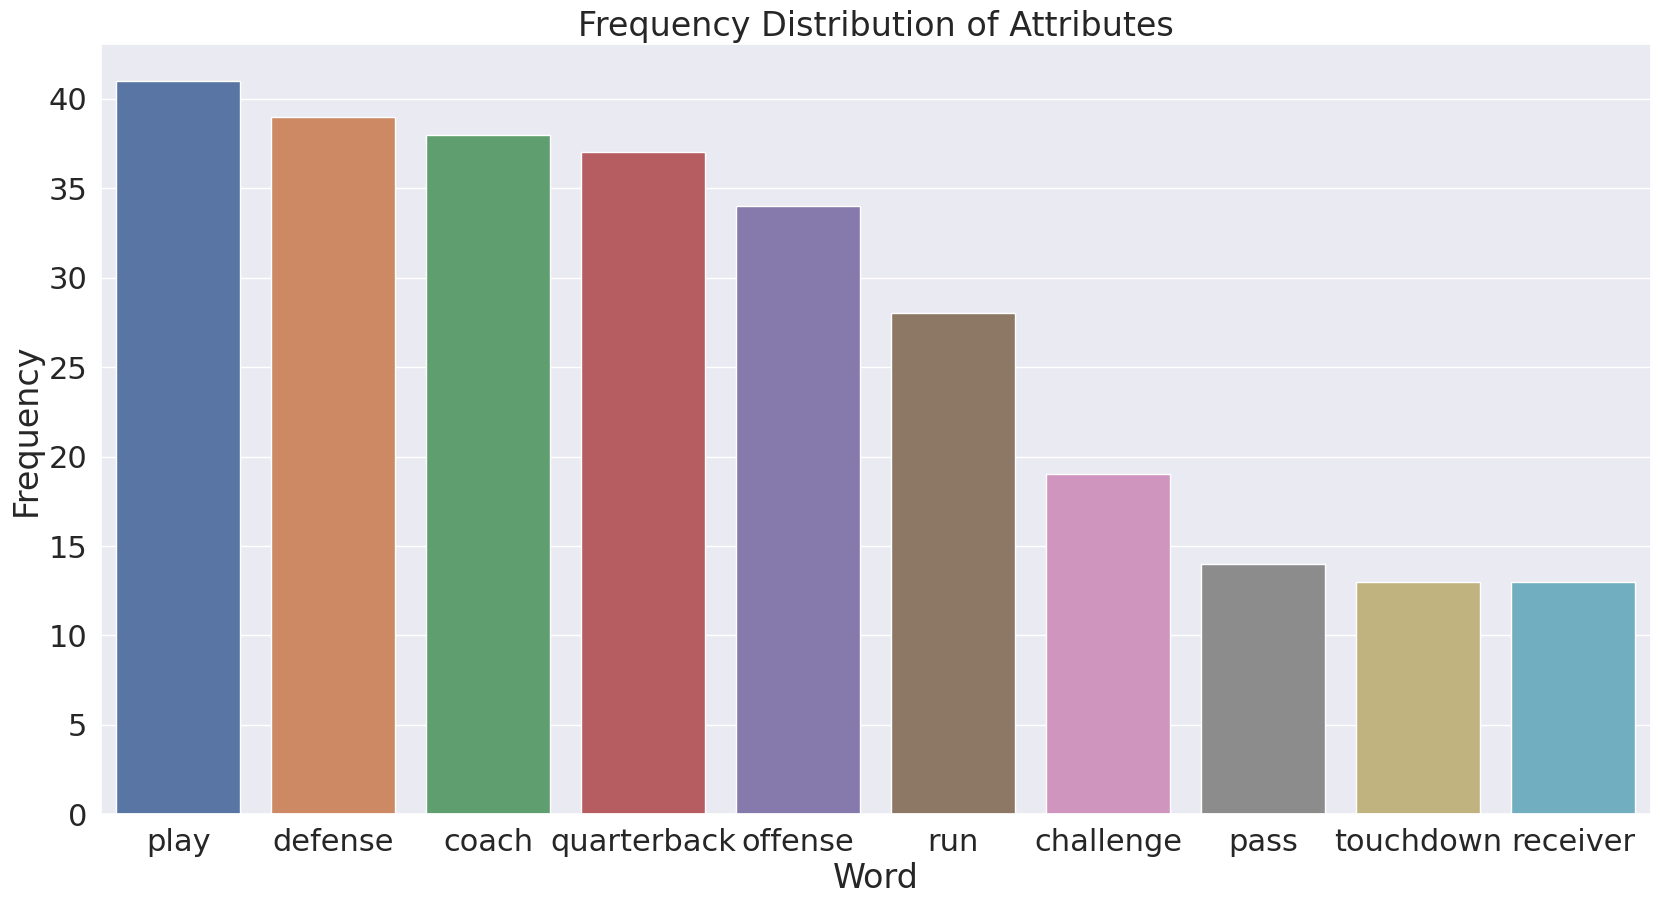

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2)
plt.figure(figsize=(20,10))
sns.barplot(x='Word',y='Frequency',data=top_10Df)
plt.title('Frequency Distribution of Attributes')

#### Calculating Lift

In [11]:
# Joins the tokenized words into a sentence

def join_words(comment):
    return " ".join(comment)

data['joined_transcript'] = data['tokenized_message'].map(join_words)

In [12]:
# Creating a dataframe with the game and their corresponding transcript, stop words removed

data2= data.copy()

game_names = ['Troy 22', 'Central Arkansas 22', 'Georgia Tech 22', 'Tulsa 22', 'Kentucky 22', 'Vanderbilt 22', 'Auburn 22', 'LSU 22', 'Texas A&M 22', 'Alabama 22', 'Arkansas 22', 'Mississippi State 22', 'Texas Tech 22', 'Louisville 21', 'Austin Peay 21', 'Tulane 21', 'Alabama 21', 'Arkansas 21', 'Tennessee 21', 'LSU 21', 'Auburn 21', 'Liberty 21', 'Texas A&M 21', 'Vanderbilt 21', 'Mississippi State 21', 'Baylor 21', 'Florida 20', 'Kentucky 20', 'Alabama 20', 'Arkansas 20', 'Auburn 20', 'Vanderbilt 20', 'South Carolina 20', 'Mississippi State 20', 'LSU 20', 'Indiana 20', 'Mercer 23', 'Tulane 23', 'Georgia Tech 23', 'Alabame 23', 'LSU 23']

data2.reset_index(drop=True, inplace=True)
data2['School'] = game_names

data2 = data2[['School', 'joined_transcript']]
data2

,School,joined_transcript
0,Troy 22,know game week obviously guys know one day tim...
1,Central Arkansas 22,okay game recap kind tale two games probably k...
2,Georgia Tech 22,okay know really pleased game lot areas know c...
3,Tulsa 22,okay first time guys since watching film thoug...
4,Kentucky 22,right recapping game know sometimes watch film...
5,Vanderbilt 22,right recap game think first know know mention...
6,Auburn 22,okay recap game glad got road win glad weigh p...
7,LSU 22,recap game really enjoy finished proud always ...
8,Texas A&M 22,right know really guess year first time know m...
9,Alabama 22,right obviously game game recap really good se...


For each game, we can see if there is a difference in the words used by Lane Kiffin before Ole Miss wins and before they lose. Below are two lists of words we believe to be associated with a win. We can predict if Ole Miss will win if there is high lift between these words and all other words.

In [13]:
pep_talk_words = [ "seize the moment", "hard work pays off", "victory awaits", "show our skills", "precision", "execute",
                  "stick to the plan", "played smart","unity", "communication", "support", "collaboration", "believe",
                   "visualize success", "talent", "confidence", "overcome", "adversity", "fight till the end", "champions rise",
                   "success", "win", "dominate", "fight", "victorious", "fruitful", "glory", "faith", "determination",
                   "excellence", "tenacity", "conquer", "triumph", "no surrender", "persistence", "unyielding", "triumphant",
                   "mastery", "resolute", "unstoppable", "success", "achieve", "persevere", "great outcome", "awesome win"
]

additional_pep_talk_words = ["crush", "own", "strive", "rise", "in it", "bring home", "leave it", "claim", "push", "outperform",
                            "play to", "chase", "aim for", "game-changer", "pursue", "champion", "achieve", "conquer",
                            "lead to", "triumphant", "unleash", "victory is", "winning", "strategic", "seal the", "thrive",
                            "bold and", "master", "drive for", "command", "excel", "winning formula", "triumph over",
                            "emerge", "elevate to", "conquer the", "victory is within", "win with", "success is", "conquer with",
                            "celebrate", "chase your", "inspire", "passion for", "champion's", "seal", "victory dance", "victorious"]


pep_talk_words.extend(additional_pep_talk_words)

In [14]:
# Replaced all these phrases with the word 'win' and calculated lift for this word against the games to find the association.

def replace_aspirations(x):
    for word in pep_talk_words:
        x=x.replace(word,'win')
    return x

data2["message_with_wins"]= data2['joined_transcript'].apply(lambda x: replace_aspirations(x))

data2

,School,joined_transcript,message_with_wins
0,Troy 22,know game week obviously guys know one day tim...,know game week obviously guys know one day tim...
1,Central Arkansas 22,okay game recap kind tale two games probably k...,okay game recap kind tale two games probably k...
2,Georgia Tech 22,okay know really pleased game lot areas know c...,okay know really pleased game lot areas know c...
3,Tulsa 22,okay first time guys since watching film thoug...,okay first time guys since watching film thoug...
4,Kentucky 22,right recapping game know sometimes watch film...,right recapping game know sometimes watch film...
5,Vanderbilt 22,right recap game think first know know mention...,right recap game think first know know mention...
6,Auburn 22,okay recap game glad got road win glad weigh p...,okay recap game glad got road win glad weigh p...
7,LSU 22,recap game really enjoy finished proud always ...,recap game really enjoy finished proud always ...
8,Texas A&M 22,right know really guess year first time know m...,right know really guess year first time know m...
9,Alabama 22,right obviously game game recap really good se...,right obviously game game recap really good se...


In [15]:
#Calculating win lift

df = pd.DataFrame(columns = ['Win Lift'], index = data2['School'])

data2['message_with_wins'] = data2['School'] + ' ' + data2['message_with_wins']

# Loop through school transcripts to calculate lift values
for i in range(len(data2['School'])):
    school_count = 0
    win_count = 0
    school_with_win_count = 0

    for comment in data2['message_with_wins']:
        if data2['message_with_wins'][i] in comment:
            school_count += 1
            if 'win' in comment:
                school_with_win_count += 1
        if 'win' in comment:
            win_count += 1

    # Calculate lift value based on counts
    lift = ((school_with_win_count * len(data2)) / (school_count * win_count))

    # Store the lift value in the lift table
    df.loc[data2['School']] = lift

# Sort the lift table for better readability
df.sort_index(inplace=True)

df

,Win Lift
School,
Alabama 20,1.0
Alabama 21,1.0
Alabama 22,1.0
Alabame 23,1.0
Arkansas 20,1.0
Arkansas 21,1.0
Arkansas 22,1.0
Auburn 20,1.0
Auburn 21,1.0


The lift value of 1 for each game means that the words associated with winning are independent from if the team wins or loses. Therefore, the lift between these words cannot be used to predict the outcome of the game.

In [16]:
data3= data.copy()

game_names = ['Troy 22', 'Central Arkansas 22', 'Georgia Tech 22', 'Tulsa 22', 'Kentucky 22', 'Vanderbilt 22', 'Auburn 22', 'LSU 22', 'Texas A&M 22', 'Alabama 22', 'Arkansas 22', 'Mississippi State 22', 'Texas Tech 22', 'Louisville 21', 'Austin Peay 21', 'Tulane 21', 'Alabama 21', 'Arkansas 21', 'Tennessee 21', 'LSU 21', 'Auburn 21', 'Liberty 21', 'Texas A&M 21', 'Vanderbilt 21', 'Mississippi State 21', 'Baylor 21', 'Florida 20', 'Kentucky 20', 'Alabama 20', 'Arkansas 20', 'Auburn 20', 'Vanderbilt 20', 'South Carolina 20', 'Mississippi State 20', 'LSU 20', 'Indiana 20', 'Mercer 23', 'Tulane 23', 'Georgia Tech 23', 'Alabame 23', 'LSU 23']

data3.reset_index(drop=True, inplace=True)
data3['School'] = game_names

data3 = data3[['School', 'joined_transcript']]
data3

,School,joined_transcript
0,Troy 22,know game week obviously guys know one day tim...
1,Central Arkansas 22,okay game recap kind tale two games probably k...
2,Georgia Tech 22,okay know really pleased game lot areas know c...
3,Tulsa 22,okay first time guys since watching film thoug...
4,Kentucky 22,right recapping game know sometimes watch film...
5,Vanderbilt 22,right recap game think first know know mention...
6,Auburn 22,okay recap game glad got road win glad weigh p...
7,LSU 22,recap game really enjoy finished proud always ...
8,Texas A&M 22,right know really guess year first time know m...
9,Alabama 22,right obviously game game recap really good se...


In [17]:
#Repeating the same with words associated with a lost game

loss_talk_words = ["disappointing", "defeat", "setback", "challenge", "struggle", "lose", "lost", "missed", "frustration",
                             "regret", "difficult", "unfortunate", "tough", "adversity", "learn from", "improve", "mistakes",
                             "reflect", "fall short", "overcome", "recover", "bounce back", "next time", "resilience", "stay focused",
                             "analysis", "evaluate", "revise", "adjust", "refine", "growth", "development", "build on", "refocus",
                             "challenge", "hurdle", "obstacle", "work harder", "adapt", "persevere", "character", "determination",
                             "sportsmanship", "team spirit", "support", "unity", "encouragement", "fan support", "gratitude",
                             "thankful", "appreciate"]

In [18]:
def replace_words(x):
    for word in loss_talk_words:
        x=x.replace(word,'loss')
    return x

data3["message_with_loss"]= data3['joined_transcript'].apply(lambda x: replace_words(x))

data3

,School,joined_transcript,message_with_loss
0,Troy 22,know game week obviously guys know one day tim...,know game week obviously guys know one day tim...
1,Central Arkansas 22,okay game recap kind tale two games probably k...,okay game recap kind tale two games probably k...
2,Georgia Tech 22,okay know really pleased game lot areas know c...,okay know really pleased game lot areas know l...
3,Tulsa 22,okay first time guys since watching film thoug...,okay first time guys since watching film thoug...
4,Kentucky 22,right recapping game know sometimes watch film...,right recapping game know sometimes watch film...
5,Vanderbilt 22,right recap game think first know know mention...,right recap game think first know know mention...
6,Auburn 22,okay recap game glad got road win glad weigh p...,okay recap game glad got road win glad weigh p...
7,LSU 22,recap game really enjoy finished proud always ...,recap game really enjoy finished proud always ...
8,Texas A&M 22,right know really guess year first time know m...,right know really guess year first time know m...
9,Alabama 22,right obviously game game recap really good se...,right obviously game game recap really good se...


In [19]:
#Calculate lift between loss words

from torch.nn.modules import loss
df2 = pd.DataFrame(columns = ['Loss Lift'], index = data3['School'])

data3['message_with_loss'] = data3['School'] + ' ' + data3['message_with_loss']

# Loop through school transcripts to calculate lift values
for i in range(len(data3['School'])):
    school = 0
    loss_count = 0
    school_with_loss_count = 0

    for comment in data3['message_with_loss']:
        if data3['message_with_loss'][i] in comment:
            school += 1
            if 'loss' in comment:
                school_with_loss_count += 1
        if 'loss' in comment:
            loss_count += 1

    # Calculate lift value based on counts
    lift = ((school_with_loss_count * len(data3)) / (school * loss_count))

    # Store the lift value in the lift table
    df2.loc[data3['School']] = lift

# Sort the lift table for better readability
df2.sort_index(inplace=True)

df2

,Loss Lift
School,
Alabama 20,1.0
Alabama 21,1.0
Alabama 22,1.0
Alabame 23,1.0
Arkansas 20,1.0
Arkansas 21,1.0
Arkansas 22,1.0
Auburn 20,1.0
Auburn 21,1.0


#### Sentiment Analysis

In [20]:
vader = data.copy()

game_names = ['Troy 22', 'Central Arkansas 22', 'Georgia Tech 22', 'Tulsa 22', 'Kentucky 22', 'Vanderbilt 22', 'Auburn 22', 'LSU 22', 'Texas A&M 22', 'Alabama 22', 'Arkansas 22', 'Mississippi State 22', 'Texas Tech 22', 'Louisville 21', 'Austin Peay 21', 'Tulane 21', 'Alabama 21', 'Arkansas 21', 'Tennessee 21', 'LSU 21', 'Auburn 21', 'Liberty 21', 'Texas A&M 21', 'Vanderbilt 21', 'Mississippi State 21', 'Baylor 21', 'Florida 20', 'Kentucky 20', 'Alabama 20', 'Arkansas 20', 'Auburn 20', 'Vanderbilt 20', 'South Carolina 20', 'Mississippi State 20', 'LSU 20', 'Indiana 20', 'Mercer 23', 'Tulane 23', 'Georgia Tech 23', 'Alabame 23', 'LSU 23']

vader.reset_index(drop=True, inplace=True)
vader['School'] = game_names

vader = vader[['School', 'joined_transcript']]
vader

,School,joined_transcript
0,Troy 22,know game week obviously guys know one day tim...
1,Central Arkansas 22,okay game recap kind tale two games probably k...
2,Georgia Tech 22,okay know really pleased game lot areas know c...
3,Tulsa 22,okay first time guys since watching film thoug...
4,Kentucky 22,right recapping game know sometimes watch film...
5,Vanderbilt 22,right recap game think first know know mention...
6,Auburn 22,okay recap game glad got road win glad weigh p...
7,LSU 22,recap game really enjoy finished proud always ...
8,Texas A&M 22,right know really guess year first time know m...
9,Alabama 22,right obviously game game recap really good se...


In [21]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [22]:
# Create a VADER sentiment analyzer object
analyzer = SentimentIntensityAnalyzer()

sentiment_scores = []

for comment in vader['joined_transcript']:
    sentiments = analyzer.polarity_scores(comment)
    sentiment_scores.append(sentiments)

vader['scores'] = sentiment_scores
vader['sentiment'] = vader['scores'].apply(lambda score_dict: score_dict['compound'])
vader['sentiment_score'] = vader['sentiment'].apply(lambda c: 'pos' if c >= 0 else 'neg')

vader

,School,joined_transcript,scores,sentiment,sentiment_score
0,Troy 22,know game week obviously guys know one day tim...,"{'neg': 0.045, 'neu': 0.662, 'pos': 0.293, 'co...",0.9998,pos
1,Central Arkansas 22,okay game recap kind tale two games probably k...,"{'neg': 0.074, 'neu': 0.62, 'pos': 0.306, 'com...",0.9997,pos
2,Georgia Tech 22,okay know really pleased game lot areas know c...,"{'neg': 0.049, 'neu': 0.625, 'pos': 0.327, 'co...",0.9998,pos
3,Tulsa 22,okay first time guys since watching film thoug...,"{'neg': 0.059, 'neu': 0.639, 'pos': 0.302, 'co...",0.9998,pos
4,Kentucky 22,right recapping game know sometimes watch film...,"{'neg': 0.057, 'neu': 0.65, 'pos': 0.293, 'com...",0.9998,pos
5,Vanderbilt 22,right recap game think first know know mention...,"{'neg': 0.054, 'neu': 0.635, 'pos': 0.311, 'co...",0.9999,pos
6,Auburn 22,okay recap game glad got road win glad weigh p...,"{'neg': 0.067, 'neu': 0.647, 'pos': 0.285, 'co...",0.9998,pos
7,LSU 22,recap game really enjoy finished proud always ...,"{'neg': 0.076, 'neu': 0.641, 'pos': 0.283, 'co...",0.9996,pos
8,Texas A&M 22,right know really guess year first time know m...,"{'neg': 0.064, 'neu': 0.575, 'pos': 0.36, 'com...",0.9998,pos
9,Alabama 22,right obviously game game recap really good se...,"{'neg': 0.05, 'neu': 0.601, 'pos': 0.349, 'com...",0.9998,pos


In [23]:
vader['sentiment'].mean()

0.9995707317073173

#### TF/IDF

In [24]:
#Could be used to predict Kifin's statements of future games

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample documents
transcripts = vader['joined_transcript']

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(transcripts)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store TF-IDF values
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Remove columns with all zeros
tfidf_df = tfidf_df.loc[:, (tfidf_df != 0).any(axis=0)]

# Sort columns by their sum in descending order
tfidf_df = tfidf_df[tfidf_df.sum().sort_values(ascending=False).index]

# Display the modified TF-IDF DataFrame
tfidf_df


,know,really,game,like,think,good,lot,guys,well,kind,...,richardson,breaking,reverse,wheelhouse,returner,camping,texts,calming,lanham,recruited
0,0.592322,0.170394,0.121710,0.129824,0.137938,0.081140,0.097368,0.137938,0.040570,0.064912,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.631235,0.145013,0.162074,0.136483,0.076772,0.119423,0.076772,0.119423,0.076772,0.110893,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.660308,0.178672,0.132062,0.093220,0.124293,0.116525,0.124293,0.186440,0.093220,0.038842,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.621565,0.175501,0.146251,0.160876,0.087750,0.080438,0.095063,0.102375,0.095063,0.036563,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.594314,0.154082,0.212779,0.190768,0.066035,0.088047,0.110058,0.102721,0.088047,0.102721,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.548488,0.214626,0.182829,0.182829,0.158982,0.063593,0.063593,0.047695,0.055644,0.103338,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.570225,0.234799,0.167713,0.125785,0.142556,0.142556,0.117399,0.092242,0.067085,0.033543,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.514251,0.199986,0.209510,0.095232,0.133324,0.123801,0.142847,0.076185,0.095232,0.133324,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.593578,0.167205,0.108683,0.242447,0.158845,0.058522,0.066882,0.075242,0.100323,0.091963,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.369687,0.184843,0.071884,0.215651,0.092422,0.030807,0.051345,0.123229,0.092422,0.123229,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Topic Modeling

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [25]:
tfidf = data.copy()

game_names = ['Troy 22', 'Central Arkansas 22', 'Georgia Tech 22', 'Tulsa 22', 'Kentucky 22', 'Vanderbilt 22', 'Auburn 22', 'LSU 22', 'Texas A&M 22', 'Alabama 22', 'Arkansas 22', 'Mississippi State 22', 'Texas Tech 22', 'Louisville 21', 'Austin Peay 21', 'Tulane 21', 'Alabama 21', 'Arkansas 21', 'Tennessee 21', 'LSU 21', 'Auburn 21', 'Liberty 21', 'Texas A&M 21', 'Vanderbilt 21', 'Mississippi State 21', 'Baylor 21', 'Florida 20', 'Kentucky 20', 'Alabama 20', 'Arkansas 20', 'Auburn 20', 'Vanderbilt 20', 'South Carolina 20', 'Mississippi State 20', 'LSU 20', 'Indiana 20', 'Mercer 23', 'Tulane 23', 'Georgia Tech 23', 'Alabame 23', 'LSU 23']

tfidf.reset_index(drop=True, inplace=True)
tfidf['School'] = game_names

tfidf = tfidf[['School', 'joined_transcript']]
tfidf

,School,joined_transcript
0,Troy 22,know game week obviously guys know one day tim...
1,Central Arkansas 22,okay game recap kind tale two games probably k...
2,Georgia Tech 22,okay know really pleased game lot areas know c...
3,Tulsa 22,okay first time guys since watching film thoug...
4,Kentucky 22,right recapping game know sometimes watch film...
5,Vanderbilt 22,right recap game think first know know mention...
6,Auburn 22,okay recap game glad got road win glad weigh p...
7,LSU 22,recap game really enjoy finished proud always ...
8,Texas A&M 22,right know really guess year first time know m...
9,Alabama 22,right obviously game game recap really good se...


In [26]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(3005)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
#Stemming and Lemmetizing the words

stemmer= PorterStemmer()

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(lemmatize_stemming(token))
    return result

In [28]:
#Showing original statement vs stemmed and lemmatized version

doc_sample = tfidf['joined_transcript'].iloc[0]  # testing with the first document
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))


original document: 
['know', 'game', 'week', 'obviously', 'guys', 'know', 'one', 'day', 'time', 'know', 'walked', 'today', 'lot', 'times', 'monday', 'shorter', 'practices', 'know', 'grinded', 'pretty', 'hard', 'wanted', 'two', 'physical', 'days', 'row', 'mock', 'game', 'make', 'sure', 'getting', 'legs', 'back', 'go', 'know', 'normal', 'tuesday', 'wednesday', 'thursday', 'friday', 'routine', 'know', 'would', 'say', 'mock', 'game', 'know', 'general', 'think', 'played', 'great', 'think', 'know', 'much', 'try', 'create', 'game', 'day', 'atmosphere', 'routine', 'get', 'players', 'play', 'really', 'hard', 'sometimes', 'happens', 'without', 'crowd', 'know', 'think', 'played', 'great', 'three', 'phases', 'means', 'know', 'actually', 'team', 'played', 'harder', 'know', 'showed', 'today', 'got', 'show', 'every', 'game', 'matter', 'playing', 'know', 'service', 'team', 'game', 'lot', 'closer', 'beat', 'first', 'question', 'still', 'made', 'quarterback', 'decision', 'thought', 'played', 'okay', 'wo

In [29]:
processed_docs = tfidf['joined_transcript'].map(preprocess)
processed_docs[:10]

0    [know, game, week, obvious, guy, know, day, ti...
1    [okay, game, recap, kind, tale, game, probabl,...
2    [okay, know, pleas, game, lot, area, know, cha...
3    [okay, time, guy, watch, film, think, player, ...
4    [right, recap, game, know, watch, film, littl,...
5    [right, recap, game, think, know, know, mentio...
6    [okay, recap, game, glad, get, road, win, glad...
7    [recap, game, enjoy, finish, proud, case, year...
8    [right, know, guess, year, time, know, monday,...
9    [right, obvious, game, game, recap, good, lot,...
Name: joined_transcript, dtype: object

In [30]:
#Dictionary for our bag of words that would be used for future analysis

dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1


0 abl
1 actual
2 ago
3 alabama
4 aliv
5 american
6 answer
7 anticip
8 appreci
9 atmospher
10 attent
11 attitud
12 austin
13 away
14 awesom
15 background
16 base
17 basic
18 beat
19 begin
20 best
21 better
22 bite
23 bodi
24 bowl
25 brand
26 breach
27 breed
28 brown
29 bunch
30 busi
31 buy
32 camp
33 capac
34 card
35 catch
36 certainli
37 challeng
38 chanc
39 chang
40 chikivian
41 child
42 citi
43 close
44 closer
45 coach
46 colleg
47 color
48 come
49 compar
50 competit
51 concern
52 confid
53 constant
54 continu
55 cool
56 coolest
57 coordin
58 countri
59 coupl
60 covid
61 creat
62 cross
63 crowd
64 cultur
65 dalla
66 day
67 decis
68 defens
69 definit
70 degre
71 differ
72 difficult
73 discuss
74 disruptor
75 dix
76 doubt
77 draft
78 effort
79 elabor
80 emerg
81 end
82 enjoy
83 envis
84 especi
85 everybodi
86 exactli
87 excit
88 expect
89 fall
90 fan
91 fault
92 feel
93 fenson
94 figur
95 film
96 final
97 florida
98 follow
99 footbal
100 forev
101 forget
102 forward
103 fourth
104 frid

In [32]:
# Tuple of word mumber, count word appears in the first transcript

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus

[[(0, 1),
  (1, 2),
  (2, 4),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 4),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 3),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 3),
  (33, 1),
  (34, 2),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 2),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 10),
  (46, 1),
  (47, 1),
  (48, 7),
  (49, 2),
  (50, 1),
  (51, 3),
  (52, 3),
  (53, 1),
  (54, 2),
  (55, 3),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 3),
  (61, 2),
  (62, 1),
  (63, 4),
  (64, 1),
  (65, 1),
  (66, 6),
  (67, 2),
  (68, 8),
  (69, 1),
  (70, 1),
  (71, 6),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 3),
  (85, 1),
  (86, 2),
  (87, 3),
  (88, 1),
  (89, 2),
  (90, 1),
  (91, 1

In [33]:
# TF/IDF scores of each word in the first document

from gensim import corpora, models
tfidf_model = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf_model[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.00367159892445073),
 (1, 0.021138681945943674),
 (2, 0.032141455566601085),
 (3, 0.008849660381627428),
 (4, 0.060680321519353375),
 (5, 0.07008916724292313),
 (6, 0.046666408112247995),
 (7, 0.03792011123687045),
 (8, 0.041018716387680114),
 (9, 0.03792011123687045),
 (10, 0.0488265777827201),
 (11, 0.0540046392398968),
 (12, 0.07008916724292313),
 (13, 0.021835583233844113),
 (14, 0.06663008710666965),
 (15, 0.060680321519353375),
 (16, 0.026653868975998175),
 (17, 0.014445842498396784),
 (18, 0.024853475020548712),
 (19, 0.028511265513300698),
 (20, 0.008849660381627428),
 (21, 0.0035265163962274614),
 (22, 0.004344256711502438),
 (23, 0.060680321519353375),
 (24, 0.08553379653990209),
 (25, 0.041018716387680114),
 (26, 0.08617369524594948),
 (27, 0.08617369524594948),
 (28, 0.0488265777827201),
 (29, 0.026653868975998175),
 (30, 0.0540046392398968),
 (31, 0.03792011123687045),
 (32, 0.069999612168372),
 (33, 0.07008916724292313),
 (34, 0.14017833448584627),
 (35, 0.026653868

#### Running LDA using Bag of Words

In [34]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [35]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.039*"know" + 0.016*"play" + 0.013*"like" + 0.013*"game" + 0.009*"get" + 0.009*"guy" + 0.009*"good" + 0.009*"go" + 0.009*"think" + 0.008*"lot"
Topic: 1 
Words: 0.049*"know" + 0.021*"play" + 0.019*"game" + 0.018*"get" + 0.016*"think" + 0.014*"like" + 0.012*"guy" + 0.012*"kind" + 0.011*"year" + 0.011*"good"
Topic: 2 
Words: 0.073*"know" + 0.029*"game" + 0.022*"play" + 0.021*"think" + 0.017*"guy" + 0.014*"like" + 0.013*"go" + 0.012*"get" + 0.012*"lot" + 0.012*"good"
Topic: 3 
Words: 0.074*"know" + 0.024*"think" + 0.022*"play" + 0.019*"game" + 0.017*"like" + 0.014*"go" + 0.014*"year" + 0.014*"get" + 0.013*"good" + 0.012*"kind"
Topic: 4 
Words: 0.049*"know" + 0.018*"play" + 0.014*"like" + 0.014*"think" + 0.013*"game" + 0.011*"lot" + 0.010*"go" + 0.009*"kind" + 0.009*"get" + 0.009*"guy"
Topic: 5 
Words: 0.032*"know" + 0.014*"play" + 0.011*"like" + 0.009*"game" + 0.008*"think" + 0.007*"get" + 0.006*"kind" + 0.006*"go" + 0.006*"guy" + 0.006*"year"
Topic: 6 
Words: 0.054*"know

In [36]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.002*"chemistri" + 0.002*"travel" + 0.001*"leigh" + 0.001*"hous" + 0.001*"charli" + 0.001*"cultur" + 0.001*"amaz" + 0.001*"emot" + 0.001*"heat" + 0.001*"live"
Topic: 1 Word: 0.002*"signal" + 0.001*"eighth" + 0.001*"carrol" + 0.001*"mid" + 0.001*"yell" + 0.001*"establish" + 0.001*"old" + 0.001*"polici" + 0.001*"auburn" + 0.001*"discuss"
Topic: 2 Word: 0.001*"red" + 0.001*"rivalri" + 0.001*"zone" + 0.001*"thursday" + 0.001*"share" + 0.001*"neat" + 0.001*"visibl" + 0.001*"davidson" + 0.001*"leech" + 0.001*"egg"
Topic: 3 Word: 0.001*"surgeri" + 0.001*"runoff" + 0.001*"farm" + 0.001*"wors" + 0.001*"south" + 0.001*"carolina" + 0.001*"cooper" + 0.001*"tree" + 0.001*"slide" + 0.001*"perkin"
Topic: 4 Word: 0.001*"luke" + 0.001*"run" + 0.001*"scissor" + 0.001*"paper" + 0.001*"real" + 0.001*"prepar" + 0.001*"mock" + 0.001*"footbal" + 0.001*"pleas" + 0.001*"send"
Topic: 5 Word: 0.001*"kaden" + 0.001*"count" + 0.001*"evalu" + 0.001*"magnifi" + 0.001*"new" + 0.001*"indiana" + 0.001*"

#### Bert

In [37]:
!pip install bertopic
!pip install bertopic[visualization]
!pip install bertopic[spacy]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 20.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.5 MB/s eta 0:00:00
  Preparing metadata (se

In [40]:
from bertopic import BERTopic

model = BERTopic(verbose=True)

#convert to list
docs = tfidf['joined_transcript'].to_list()

topics, probabilities = model.fit_transform(docs)
model.get_topic_freq()

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2023-10-11 22:19:40,643 - BERTopic - Transformed documents to Embeddings
2023-10-11 22:19:43,419 - BERTopic - Reduced dimensionality
2023-10-11 22:19:43,427 - BERTopic - Clustered reduced embeddings


,Topic,Count
0,-1,41


#### Similarity Clustering with PCA

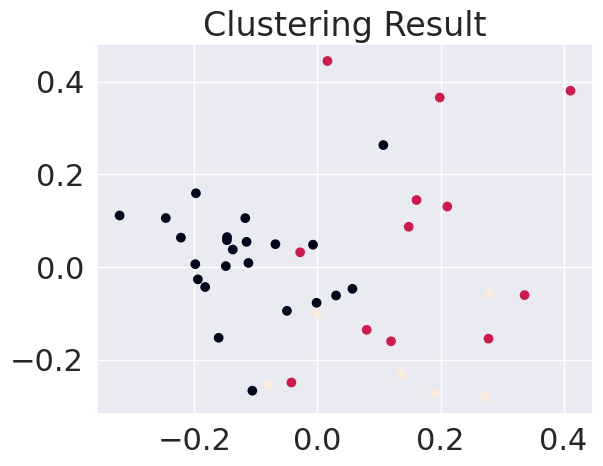

In [41]:
from gensim.similarities import MatrixSimilarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Compute the similarity matrix
similarity_matrix = MatrixSimilarity(corpus_tfidf)

# Getting a list of all the similarity scores
similarity_scores = list(similarity_matrix)

# For clustering, let's say we want to use KMeans. We need to convert our corpus to a matrix
tfidf_dense = gensim.matutils.corpus2dense(corpus_tfidf, num_terms=len(dictionary))

# Transposing to have terms as features
tfidf_dense = np.transpose(tfidf_dense)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3).fit(tfidf_dense)  # Example: 3 clusters
tfidf['cluster'] = kmeans.labels_

# PCA for visualization
pca = PCA(n_components=2).fit_transform(tfidf_dense)

# Plotting the clustering result
plt.scatter(pca[:, 0], pca[:, 1], c=tfidf['cluster'])
plt.title('Clustering Result')
plt.show()

#### Random Forest

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Sample Data
df = all_transcripts

# Encoding labels
df['Label'] = df['Full Time Win or Loss'].apply(lambda x: 1 if x == 'W' else 0)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5)  # Using 1000 features for simplicity
X_tfidf = vectorizer.fit_transform(df['Transcript'])

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Transcript'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Combine Features: TF-IDF and Sentiment
X = pd.concat([pd.DataFrame(X_tfidf.toarray()), df['Sentiment']], axis=1)
y = df['Label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert all column names to string
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
from sklearn.neural_network import MLPClassifier

# Model Training and Prediction with Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
predictions_rf = clf_rf.predict(X_test)

# Evaluation
print("Random Forest Classification Report:\n", classification_report(y_test, predictions_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.55      0.75      0.63         8

    accuracy                           0.46        13
   macro avg       0.27      0.38      0.32        13
weighted avg       0.34      0.46      0.39        13



#### Neural Network

In [52]:
# Model Training and Prediction with Neural Network
clf_nn = MLPClassifier(random_state=42, max_iter=1000)
clf_nn.fit(X_train, y_train)
predictions_nn = clf_nn.predict(X_test)

print("Neural Network Classification Report:\n", classification_report(y_test, predictions_nn))

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13



#### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

# Model Training and Prediction with Logistic Regression
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)
predictions_lr = clf_lr.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, predictions_lr))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13

